- - - -
# Mechpy
a mechanical engineer's toolbox   
- - - -

- - - -

## 1) [Statics](#Statics)
* [Example 1: A simple supported beam with shear-bending plots](#Statics-Example-1)
* [Example 2: Vector calculation method to calculate 3-D moments](#Statics-Example-2)
* [Distributed Loads Calculations](#Distributed-Loads-Calculations)

## 2) [Materials](#Materials)
* [composite mechanics](#Composite-Mechanics)


## 3) Kinematics
* [double_pendulum](http://matplotlib.org/examples/animation/double_pendulum_animated.html)


## 4) Dynamics 
* [dynamics](#Dynamics)
* [Python Vibration Codes](http://vibrationdata.com/software.htm)
* [Dynamics Notes](#Dynamics-Vibrations-Notes)

## 5) Numerical Methods


## Appendix A: [Engineering Mathematics with Python](#Engineering-Mathematics-with-Python)
[Differential Equations](#Differential-Equations)
[Linear Algebra](#Linear-Algebra)  
[Signal Processing](#Signal-Processing)  
[Finite Element Method](#Finite-Element-Method)
[Units](#Units) 

- - - -
- - - -

## References
Hibbler - Statics  
Hibbler - Mechanics of Materials  



## Python Initilaization with module imports

In [163]:
# setup 
import numpy as np
import sympy as sp
import scipy
from pprint import pprint
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

Using matplotlib backend: nbAgg


- - - -
# Statics 
[index](#Mechpy)
- - - -

The sum of the forces is zero
$$
\Sigma F_x =0 , \Sigma F_y =0 , \Sigma F_z =0  
$$
The sum of the moments is zero
$$
\Sigma M_x =0 , \Sigma M_y =0 , \Sigma M_z =0  
$$

Dot Product

$$
\vec{A} \bullet \vec{B} = ABcos\left(\theta\right)= A_xB_x + A_yB_y+A_zB_z
$$

Cross-Product

$$
\vec{C}=\vec{A} \times \vec{B} = 
\begin{vmatrix}
    \widehat{i} & \widehat{j} & \widehat{k}\\
    A_{x} & A_{y} & A_{z}\\
    B_{x} & B_{y} & B_{z}
\end{vmatrix} 
$$

Moment of Force
$$
M_0 = Fd \\
\vec{M_0}=\vec{r}\times \vec{F} = 
\begin{vmatrix}
    \widehat{i} & \widehat{j} & \widehat{k}\\
    r_{x} & r_{y} & r_{z}\\
    F_{x} & F_{y} & F_{z}
\end{vmatrix} 
$$

Moment of Force about a Specified axis
$$
\vec{M_a}=\vec{u}\bullet\vec{r}\times \vec{F} = 
\begin{vmatrix}
    u_{x} & u_{y} & u_{z} \\
    r_{x} & r_{y} & r_{z} \\
    F_{x} & F_{y} & F_{z}
\end{vmatrix} 
$$


### Statics-Example 1
#### A simple supported beam with shear-bending plots

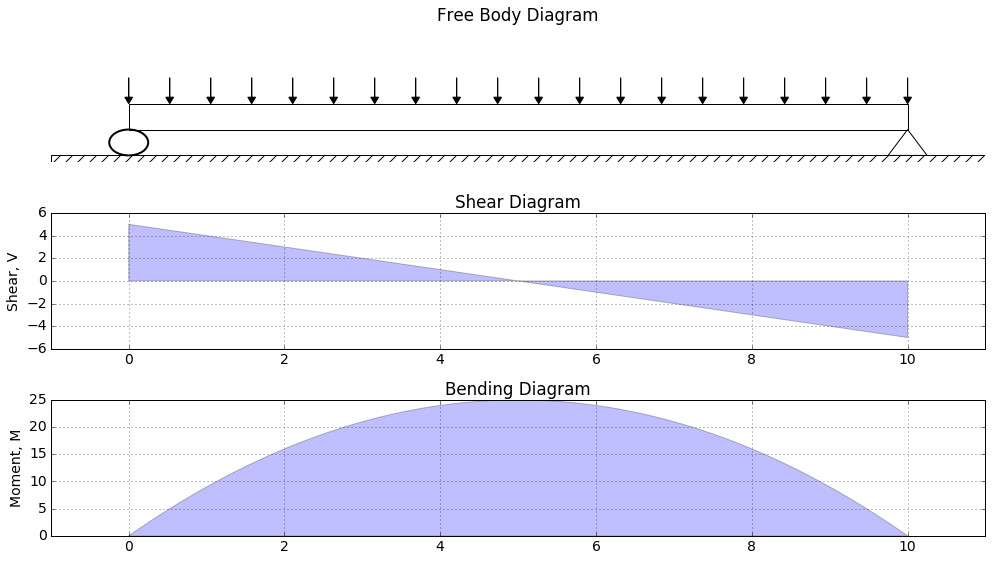

In [125]:
L = 10
b = 5
a = 3
P = 10

plt.rcParams['figure.figsize'] = (14, 8)  # (width, height)

fig1 = plt.figure()

#plt.subplot(3,1,1)
#ax = plt.gca()
ax1 = fig1.add_subplot(311)#, aspect='equal')


plt.xlim([-1, L+1])
plt.ylim([-1, P*2])

# add rigid ground
rectangle = plt.Rectangle((-1, -2), L+2, 2, hatch='//', fill=False)
ax1.add_patch(rectangle)

# add rigid rollers
#circle = plt.Circle((0, 5), radius=1, fc='g')
#ax.add_patch(circle)
e1 = patches.Ellipse((0, 2), .5, 4, angle=0, linewidth=2, fill=False, zorder=2)
ax1.add_patch(e1)

points = [[10, 4], [9.75, 0], [10.25,0]]
polygon = plt.Polygon(points, fill=False)
ax1.add_patch(polygon)

# add beam
rectangle = plt.Rectangle((0, 4), L, 4, fill=False)
ax1.add_patch(rectangle)

# add load
for k in np.linspace(0,L,20):
    ax1.arrow(k, 12, 0, -3, head_width=L*.01, head_length=L*.1, fc='k', ec='k')
plt.title('Free Body Diagram')
plt.axis('off') # removes axis and labels
#ax1.set_yticklabels('')

x = [0,0,L,L]
y = [0,5,-5,0]
plt.subplot(3,1,2)
plt.ylabel('Shear, V')
plt.title('Shear Diagram')
plt.fill(x, y, 'b', alpha=0.25)
plt.grid(True)
plt.xlim([-1, 11])

x = np.linspace(-L/2,L/2,100)
y = -(x**2)+(np.max(x**2))
x = np.linspace(0,L,100)
plt.subplot(3,1,3)
plt.title('Bending Diagram')
plt.ylabel('Moment, M')
plt.fill(x, y, 'b', alpha=0.25)
plt.grid(True)
plt.xlim([-1, 11])

plt.tight_layout()

plt.show()



### Statics-Example 2
### Vector calculation method to calculate 3-D moments

$
\vec{M_{R_0}}=\Sigma \left( \vec{r} \times \vec{F} \right) = \vec{r_A}\times\vec{F_1} +\vec{r_A}\times\vec{F_2} + \vec{r_B}\times\vec{F_3}
$

Total Moment vector
[ 30 -40  60]
Total Force Vector about point O
[ 20 130 -10]
unit vector of the moment
[ 0.38411 -0.51215  0.76822]
angles at which the moments react
[  67.41146  120.80698   39.80557]


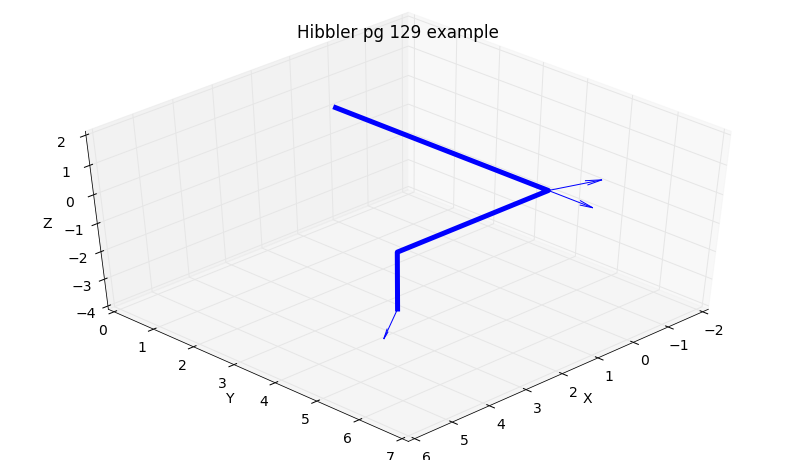

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = plt.axes(projection='3d')

# bar
x=[0,0,4,4]
y=[0,5,5,5]
z=[0,0,0,-2]

# Applied Forces
X=[0,0,4]
Y=[5,5,5]
Z=[0,0,-2]
U=[-60,0 ,80]
V=[40 ,50,40]
W=[20 ,0 ,-30]

ax.plot(x, y, z, '-b', linewidth=5)
ax.view_init(45, 45)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Hibbler pg 129 example')
ax.set_xlim([min(X)-2, max(X) + 2])
ax.set_ylim([min(Y)-5, max(Y) + 2])
ax.set_zlim([min(Z)-2, max(Z) + 2])

#plt.tight_layout()

ax.quiver3D(X, Y, Z, U, V, W, pivot='tail');

rA = np.array([0,5,0])  # start of F1 and F2
rB = np.array([4,5,-2])  # start of F3
F1 = np.array([-60,40,20])
F2 = np.array([0,50,0])
F3 = np.array([80,40,-30])
M = np.cross(rA,F1) + np.cross(rA,F2) + np.cross(rB,F3)
print('Total Moment vector') 
print(M)

print('Total Force Vector about point O')
print(sum([F1,F2,F3]))

print('unit vector of the moment')
u = M/np.linalg.norm(M)
print(u)

print('angles at which the moments react')
print(np.rad2deg(np.arccos(u)))

### Distributed Loads Calculations

$
F_R = \Sigma F=\int_L w(x) \,dx  = \int_A dA \,dx  
$

example, hibbler, pg 187

$$
F_R=\int_A dA \, =  \int_{0}^{2} \, 60x^2 \, dx = 160 N
$$

$$
 \overline{x} = \frac{\int_A x \, dA}{\int_A dA} =  \frac{\int_{0}^{2} x60x^2 \, dx}{\int_{0}^{2} \, 60x^2 \, dx} = \frac{240}{160}
$$

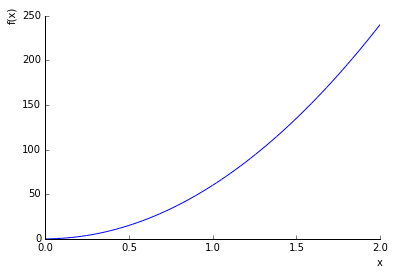

In [129]:
x = sp.var('x')
w = 60*x**2# N/m
sp.plot(w, (x,0,2));

In [130]:
w.subs(x,2)

240

In [131]:
sp.Integral(w,(x,0,2))

2         
⌠         
⎮     2   
⎮ 60⋅x  dx
⌡         
0         

In [132]:
sp.integrate(w)

    3
20⋅x 

In [133]:
sp.integrate(w,(x,0,2))

160

In [134]:
sp.Integral(x*w,(x,0,2))

2         
⌠         
⎮     3   
⎮ 60⋅x  dx
⌡         
0         

In [135]:
sp.integrate(w*x)

    4
15⋅x 

In [136]:
sp.integrate(x*w,(x,0,2))

240

In [137]:
FR= float(sp.integrate(w,(x,0,2)))
xbar = float(sp.integrate(x*w,(x,0,2)))/FR
print('center of load of an exponential distributed load is %f' % xbar)

center of load of an exponential distributed load is 1.500000


In [138]:
#hibbler pg 346

import numpy as np

r = np.array([    0, 3 , 5.25])
F = np.array([-13.5, 0 ,6.376])
M = -np.cross(r,F)

# moments 
print('M_x = %f \nM_y = %f \nM_z = %f' % (M[0], M[1], M[2] ))

M_x = -19.128000 
M_y = 70.875000 
M_z = -40.500000


# Materials
[index](#Mechpy)

## Composite Mechanics
[index](#Mechpy)

In [139]:
from mechpy import T3rot, T6rot, vary_ply_direction_plot, laminate_gen
from mechpy import qbar_transformtion, composite_plate

In [140]:
T3rot(45)

matrix([[ 0.70711,  0.70711,  0.     ],
        [-0.70711,  0.70711,  0.     ],
        [ 0.     ,  0.     ,  1.     ]])

In [141]:
print(T6rot(45,45,45))

[[ 0.25     0.25     0.5     -0.35355 -0.35355  0.25   ]
 [ 0.02145  0.72855  0.25     0.42678 -0.07322 -0.125  ]
 [ 0.72855  0.02145  0.25    -0.07322  0.42678 -0.125  ]
 [-0.25    -0.25     0.5      0.35355  0.35355  0.75   ]
 [ 0.85355 -0.14645 -0.70711  0.35355 -0.35355  0.35355]
 [-0.14645  0.85355 -0.70711 -0.35355  0.35355  0.35355]]


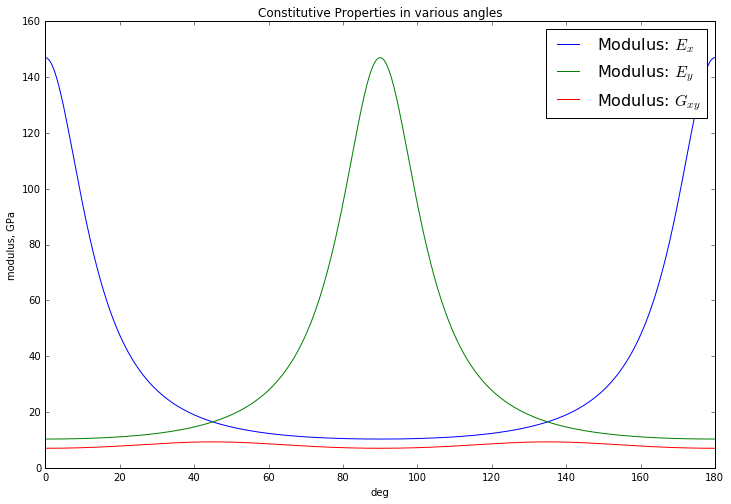

In [142]:
vary_ply_direction_plot()

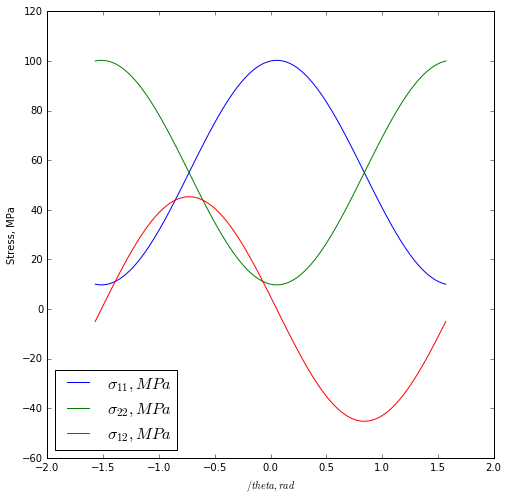

C:\Users\Neal\Miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


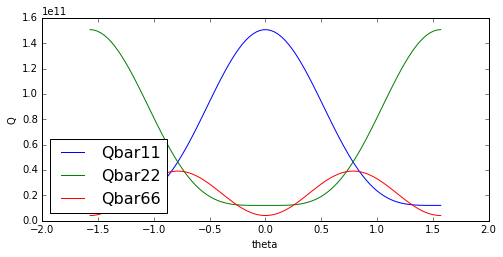

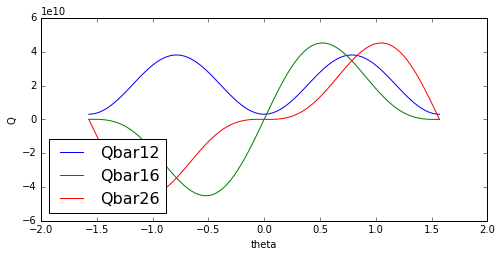

In [143]:
qbar_transformtion()

In [144]:
help(laminate_gen)

Help on function laminate_gen in module mechpy:

laminate_gen(lamthk=1.5, symang=[45, 0, 90], plyratio=2.0, matrixlayers=False, nonsym=False)
    ## function created to quickly create laminates based on given parameters
    lamthk=1.5    # total #thickness of laminate
    symang = [45,0,90, 30]  #symmertic ply angle
    plyratio=2.0  # lamina/matrix
    matrixlayers=False  # add matrix layers between lamina plys
    nonsym=False    # symmetric
    
    #ply ratio can be used to vary the ratio of thickness between a matrix ply
         and lamina ply. if the same thickness is desired, plyratio = 1, 
         if lamina is 2x as thick as matrix plyratio = 2



In [145]:
laminate_gen()

([0.25, 0.25, 0.25, 0.25, 0.25, 0.25], [45, 0, 90, 90, 0, 45], [3.0, 3.0, 3.0,
 3.0, 3.0, 3.0], [45, 0, 90, 90, 0, 45])

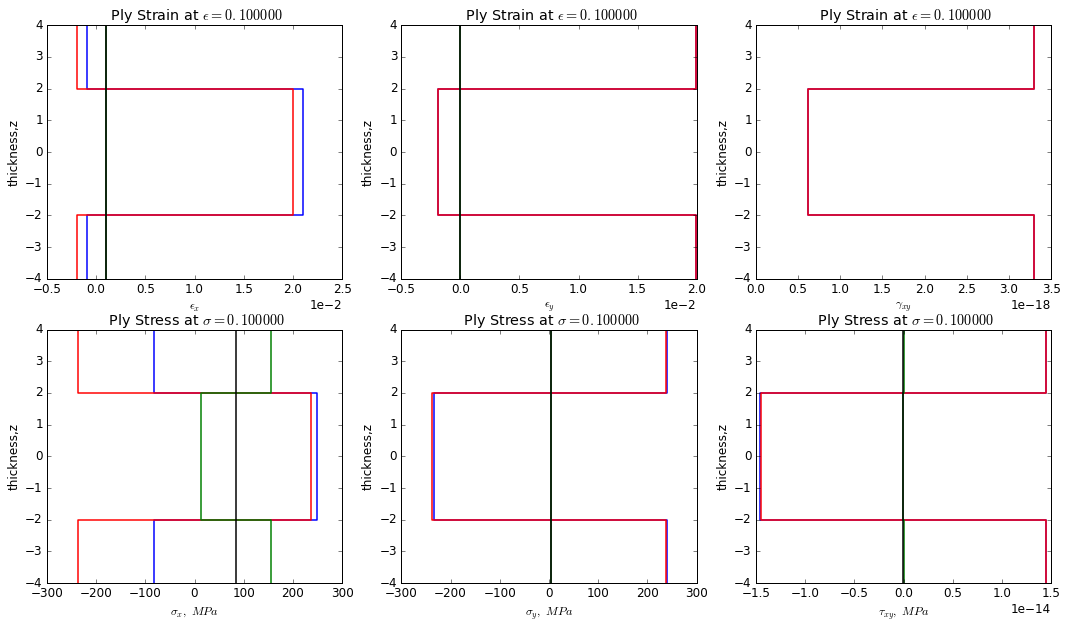

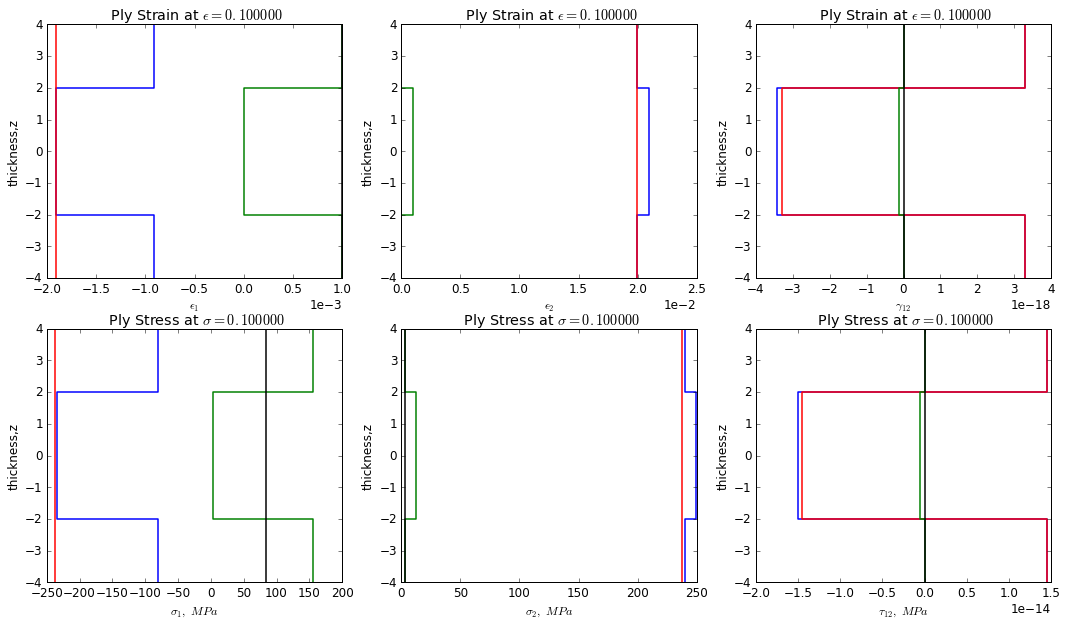

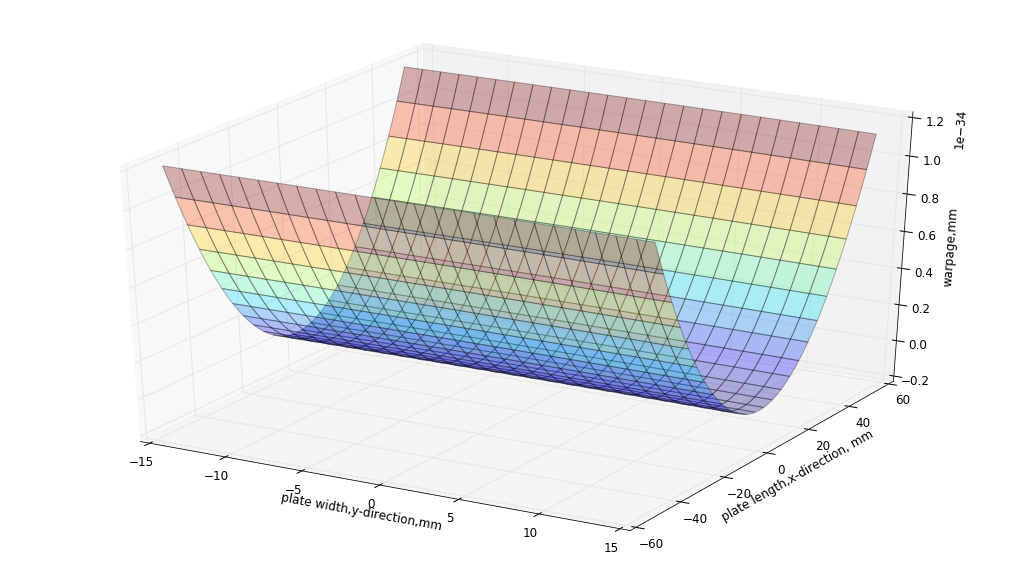

---------------Stress analysis of fibers----------
83844.7849024
83844.7849024
4400.0
[[  6.71625e+05   2.41222e+04  -8.40349e-14]
 [  2.41222e+04   6.71625e+05   3.52533e-11]
 [ -8.40349e-14   3.52533e-11   3.52000e+04]]
[[  2.10342e-06]
 [  2.10342e-06]
 [ -3.66667e-21]]
0.0359162178336


In [146]:
composite_plate()

In [147]:
from sympy import var

var('sx sy sz txy txz tyz')

(sx, sy, sz, txy, txz, tyz)

In [150]:
# Principal Stresses

sx  = 63.66
sy  = 0
sz  = 0
txy = 63.66
txz = 0
tyz = 0

S = np.matrix([[sx, txy, txz],
            [txy, sy, tyz],
            [txy, txz, sz]])

print(S)

[[ 63.66  63.66   0.  ]
 [ 63.66   0.     0.  ]
 [ 63.66   0.     0.  ]]


In [151]:
temp,principal_stresses = scipy.linalg.eig(S)
print(principal_stresses)

AttributeError: module 'scipy' has no attribute 'linalg'

In [51]:
from mechpy import ode1
ode1()

0 [ 1.] 1.0
0.1 [ 0.13534] 0.135335283237
0.2 [ 0.01832] 0.0183156388887
0.30000000000000004 [ 0.00248] 0.00247875217667
0.4 [ 0.00034] 0.000335462627903
0.5 [  4.54000e-05] 4.53999297625e-05
0.6 [  6.14422e-06] 6.14421235333e-06
0.7 [  8.31529e-07] 8.31528719104e-07
0.7999999999999999 [  1.12535e-07] 1.12535174719e-07
0.8999999999999999 [  1.52300e-08] 1.52299797447e-08
0.9999999999999999 [  2.06116e-09] 2.06115362244e-09
1.0999999999999999 [  2.78957e-10] 2.78946809287e-10


## Dynamics Vibrations Notes
**Jul 1, 2015**

## Introduction
<div id="sec:intro"></div>

modal analysis is similar to frequency analysis. In frequency analysis a complex signal is resolved into a set of simple sine waves with individual frequency and amplitude and phase parameters. In modal analysis, a complex deflection pattern of a vibrating structure is resolved into a set of simple mode shapes with the same individual parameters. 


## Structural Dynamics Background
<div id="sec:stdybg"></div>

Most systems are actually multiple degrees of freedom (MDOF) and have some non-linearity, but can be simplified with a superposition of SDOF linear systems 

Newtons law states that acceleration is a function of the applied force and the mass of the object, or
$$
[inertial forces] + [Dissipative forces] + [Restoring Forces] = [External Forces] \\
m\ddot{x} + c\dot{x} + kx = f(t)  \\
\zeta<1 is\ underdamped  \\
$$

some other dynamic characteristics are
$$
\omega = frequency  \\
\zeta = damping     \\
\{\phi\} = mode shape  \\
\omega^{2}_{n}=\frac{k}{m} = natural frequency \\
\zeta = \frac{c}{\sqrt{2km}}    \\
H(\omega)=Frequency\ Response \\
\phi(\omega)=Phase
$$

## Damping Model

Where there is energy dissipation, there is damping. The system can be broken into the system inputs/excitation, a system G(s), and the output response, in Laplace or space

The transfer function is a math model defining the input/output relationship of a physical system. Another definition is the Laplace transform ( $\mathcal{L}$) of the output divided by the Laplace transform of the input. 

The frequency response function (FRF) is defined in a similar manner such that FRF is the fourier transform ($ \mathcal{F} $) of the input divided by the fourier transform of the output

$$
Transfer\ Function=\frac{Output}{Input} \\
G(s) = \frac{Y(s)}{X(s)}
$$

## Modal Testing

These relationships can be further explained by the modal test process. The measurements taken during a test are frequency response function measurements. The parameter estimation routines are curve fits in the Laplace domain and result in transfer functions.

Frequency Response Matrix

$$
\begin{bmatrix}
 H_{11} & H_{12} & \cdots & H_{1n} \\
 H_{21} & H_{22} & \cdots & H_{2n} \\
 \vdots  & \vdots  & \ddots & \vdots  \\
 H_{n1} & H_{n2} & \cdots & H_{nn} 
\end{bmatrix}
$$

## Random Notes
<div id="sec:rand"></div>

The signal-analysis approach is done by measuring vibration with accelerometers and determine the frequency spectrum. The other moethod is a system -analysis where a dual-channel FFT anlayzer is used to measure the ratio of the response to the input giving the frequency response function (FRF)

a modal model allows the analysis of structural systems

a mode shape is a deflection-pattern associated with a particular modal frequency or pole location. It is not tangible or easily observed. The actual displacement of the structure will be a sum of all the mode shapes. A harmonic exitation close to the modal frequency, 95% of the displacement may be due to the particular modeshape

Modal Descriptions Assumes Linearity
 * Superposition of the component waves will result in the final wave. A swept sinosoid will give the same result as a broadband excitation

 * Homogeneity is when a measured FRF is independent of excitation level

 * Reciprocity implies that the FRF measured between any two DOFs is independent of which of them for excitation or response

 * small deflections - cannot predict buckling or catastrophic failure

 * casual - the structure will not vibrate before it is excited

 * stable - the vibrations will die out when the excitation is removd

 * time-invariant - the dynamic characteristics will not change during the measurments

## The Lumped-Parameter Model and Modal Theory

[Physical Coordinates] = [Modal Matrix][Modal Coordinates]

$$
[x] = [\phi][q]
$$

## Keywords and Notations

$$
m=mass        \\
k=stiffness   \\
c = damping coefficient  \\
c_c = critical damping coefficient  \\
$$



## Linear Algebra with Python
[index](#Math-with-Python)  

Python's numpy package allows python, a generic computing language to perform powerful mathematical calculations. Although python's math syntax is not as obvious as MATLAB's, the functionality is comparable. This document is designed to be an intro to that syntax 

Some references

http://nbviewer.ipython.org/github/carljv/cython_testing/blob/master/cython_linalg.ipynb

We can either use scipy, which includes numpy, 
http://docs.scipy.org/doc/

or use numpy directly
http://docs.scipy.org/doc/numpy/

Since there are many ways to solve linear algebra problems, (eg Octave/Matlab, julia, scipy, numpy)
I tend to prefer the most matlabesc approaches due to the ubiquity of Matlab and the simplicity of the syntax, which frankly, python suffers with.

The major difference between arrays and matrices in python is that arrays are n-dimensions, where matrices are only up to 2-dimensions  
m

In [ ]:
import numpy as np
from scipy import linalg

Pythons list is a generic data storage object. it can be easily extended to a numpy array, which is specialized for numerical and scientific computation 

In [88]:
np.zeros((5,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [89]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [90]:
np.matrix(np.zeros((5,3)))

matrix([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

In [91]:
np.matrix([[1,2],[3,4]])

matrix([[1, 2],
        [3, 4]])

In [92]:
# Matrix multiplication can be achieved using the dot method
i = [[1,0,0],[0,1,0],[0,0,1]]  # identiy matrix
a = [[4,3,1],[5,7,2],[2,2,2]]
np.dot(i,a)


array([[4, 3, 1],
       [5, 7, 2],
       [2, 2, 2]])

In [93]:
#Or, matrix multiplication can be done if a matrix is explicitly defined
np.matrix(i)*np.matrix(a)

matrix([[4, 3, 1],
        [5, 7, 2],
        [2, 2, 2]])

In [94]:
# Notice, when arrays are mutliplied, we get the dot product 
np.array(i)*np.array(a)

array([[4, 0, 0],
       [0, 7, 0],
       [0, 0, 2]])

In [95]:
# convert an array to a matrix
m = np.matrix(a)
m

matrix([[4, 3, 1],
        [5, 7, 2],
        [2, 2, 2]])

In [96]:
m.T  # transpose

matrix([[4, 5, 2],
        [3, 7, 2],
        [1, 2, 2]])

In [97]:
m.I  # inverse

matrix([[ 0.55555556, -0.22222222, -0.05555556],
        [-0.33333333,  0.33333333, -0.16666667],
        [-0.22222222, -0.11111111,  0.72222222]])

In [98]:
m**2

matrix([[33, 35, 12],
        [59, 68, 23],
        [22, 24, 10]])

In [99]:
np.array(a)**2

array([[16,  9,  1],
       [25, 49,  4],
       [ 4,  4,  4]])

In [102]:
m

matrix([[4, 3, 1],
        [5, 7, 2],
        [2, 2, 2]])

In [103]:
m[:,2]

matrix([[1],
        [2],
        [2]])

In [104]:
m[2,:]

matrix([[2, 2, 2]])

In [105]:
m[:2,:2]

matrix([[4, 3],
        [5, 7]])

In [107]:
m[1:,1:]

matrix([[7, 2],
        [2, 2]])

## Sympy Linear Algebra

In [1]:
# import sympy
import sympy.mpmath as spm
import sympy as sp
#from sympy.mpmath import *

In [7]:
# mpmath is a python library for arbitrary float point arithmetic
# mpf = real float
# mpc = complex float
# matrix = matrix
spm.mpf(4)
spm.mpf('1.25e-5')
spm.mpf('inf')

mpf('+inf')

In [8]:
# creates a nxn zeros matrix
A1 = spm.matrix(3)

# when a matrix is created using the sympy command matrix

#creates a nxm zeros matrix
A2 = spm.matrix(3, 2)
print(A2)
print(type(A2))

[0.0  0.0]
[0.0  0.0]
[0.0  0.0]
<class 'sympy.mpmath.matrices.matrices.matrix'>


In [9]:
# I am not sure if we can use variables in matrices
z = sp.var('z')

# or 
x,y = sp.symbols('x,y')

In [11]:
spm.eye(3)

matrix(
[['1.0', '0.0', '0.0'],
 ['0.0', '1.0', '0.0'],
 ['0.0', '0.0', '1.0']])

In [12]:
spm.diag([1, 2, 3])

matrix(
[['1.0', '0.0', '0.0'],
 ['0.0', '2.0', '0.0'],
 ['0.0', '0.0', '3.0']])

In [13]:
spm.ones(3)

matrix(
[['1.0', '1.0', '1.0'],
 ['1.0', '1.0', '1.0'],
 ['1.0', '1.0', '1.0']])

In [14]:
spm.randmatrix(3)

matrix(
[['0.315711466525634', '0.744152246553384', '0.797696458320461'],
 ['0.176998620757588', '0.746350831634511', '0.310097750960555'],
 ['0.710796660706856', '0.407693221720858', '0.0102405697114643']])

In [16]:
l = [[10, 20, 30], [40, 0, 60], [70, 80, 90]]
A6 = spm.matrix(l)
A6

matrix(
[['10.0', '20.0', '30.0'],
 ['40.0', '0.0', '60.0'],
 ['70.0', '80.0', '90.0']])

In [3]:
x = sp.Symbol('x')   # x = var('x')
M = sp.Matrix([[2,x],[x,3]])
M

⎡2  x⎤
⎢    ⎥
⎣x  3⎦

In [4]:
M.eigenvals()

⎧     __________            __________       ⎫
⎪    ╱    2                ╱    2            ⎪
⎨  ╲╱  4⋅x  + 1    5     ╲╱  4⋅x  + 1    5   ⎬
⎪- ───────────── + ─: 1, ───────────── + ─: 1⎪
⎩        2         2           2         2   ⎭

In [6]:
M.eigenvects()

⎡⎛     __________                              ⎞  ⎛   __________              
⎢⎜    ╱    2                                   ⎟  ⎜  ╱    2                   
⎢⎜  ╲╱  4⋅x  + 1    5     ⎡⎡       -x        ⎤⎤⎟  ⎜╲╱  4⋅x  + 1    5     ⎡⎡   
⎢⎜- ───────────── + ─, 1, ⎢⎢─────────────────⎥⎥⎟, ⎜───────────── + ─, 1, ⎢⎢───
⎢⎜        2         2     ⎢⎢   __________    ⎥⎥⎟  ⎜      2         2     ⎢⎢   
⎢⎜                        ⎢⎢  ╱    2         ⎥⎥⎟  ⎜                      ⎢⎢   
⎢⎜                        ⎢⎢╲╱  4⋅x  + 1    1⎥⎥⎟  ⎜                      ⎢⎢  ╲
⎢⎜                        ⎢⎢───────────── - ─⎥⎥⎟  ⎜                      ⎢⎢- ─
⎢⎜                        ⎢⎢      2         2⎥⎥⎟  ⎜                      ⎢⎢   
⎢⎜                        ⎢⎢                 ⎥⎥⎟  ⎜                      ⎢⎢   
⎣⎝                        ⎣⎣        1        ⎦⎦⎠  ⎝                      ⎣⎣   

                  ⎞⎤
                  ⎟⎥
     -x         ⎤⎤⎟⎥
────────────────⎥⎥⎟⎥
  __________    ⎥⎥⎟⎥
 ╱    2         ⎥⎥⎟⎥
╱  4

In [7]:
M.eigenvects()[1][0]

   __________    
  ╱    2         
╲╱  4⋅x  + 1    5
───────────── + ─
      2         2

In [8]:
Mval = M.eigenvects()[1][0]
Mval.evalf(subs={x:3.14})

5.67955971794838

In [10]:
print(sp.latex(M))

\left[\begin{matrix}2 & x\\x & 3\end{matrix}\right]


copy and paste into markdown 

$ \left[\begin{matrix}2 & x\\x & 3\end{matrix}\right] $


## Signal Processing
Page 174 Introduction for python for Science - David Pine

In [11]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
width = 2.0
freq = 0.5
t = np.linspace(-10, 10, 101) # linearly space time array
g = np.exp(-np.abs(t)/width)*np.sin(2.0 * np.pi * freq * t)
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max
G = fftpack.fftshift(G) # shift G order to coorespond to f
fig = plt.figure(1, figsize=(8,6), frameon=False)
ax1 = fig.add_subplot(211)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')
ax2 = fig.add_subplot(212)
ax2.plot(f, np.real(G), color='dodgerblue', label='real part')
ax2.plot(f, np.imag(G), color='coral', label='imaginary part')
ax2.legend()
ax2.set_xlabel('f')
ax2.set_ylabel('G(f)')
plt.show()

# Engineering Mathematics with Python
[index](#Mechpy)

In [3]:
from numpy import *

In [4]:
r_[1:11]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
linspace(1,10,10)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

# Units
[index](#Mechpy)

In [155]:
from mechunits import uc1
# uc1 uses sympy

In [156]:
uc1(1.0,'psi','kPa')

1.00 psi = 6.89  kPa 


In [157]:
uc1(1.0,'newton','pound')

1.00 newton = 0.22  pound 


In [161]:
from mechunits import uc2
# uses pint
uc2(17.5,'lbf','newton')

17.5 lbf = 77.84387826705874 newton


<Quantity(77.84387826705874, 'newton')>

In [162]:
uc2(300,'pascal','psi')

300 pascal = 0.043511321319062775 psi


<Quantity(0.043511321319062775, 'psi')>

In [160]:
from mechunits import in_mm
in_mm()

     0 in - 0.000000 in - 0.000000 mm 
  1/16 in - 0.062500 in - 1.587500 mm 
   1/8 in - 0.125000 in - 3.175000 mm 
  3/16 in - 0.187500 in - 4.762500 mm 
   1/4 in - 0.250000 in - 6.350000 mm 
  5/16 in - 0.312500 in - 7.937500 mm 
   3/8 in - 0.375000 in - 9.525000 mm 
  7/16 in - 0.437500 in - 11.112500 mm 
   1/2 in - 0.500000 in - 12.700000 mm 
  9/16 in - 0.562500 in - 14.287500 mm 
   5/8 in - 0.625000 in - 15.875000 mm 
 11/16 in - 0.687500 in - 17.462500 mm 
   3/4 in - 0.750000 in - 19.050000 mm 
 13/16 in - 0.812500 in - 20.637500 mm 
   7/8 in - 0.875000 in - 22.225000 mm 
 15/16 in - 0.937500 in - 23.812500 mm 
     1 in - 1.000000 in - 25.400000 mm 
